## Load Data

In [1]:
using RDatasets
using Plots
using Random
using Statistics
include("utils.jl")


Random.seed!(1234)

iris = dataset("datasets", "iris")
X = Matrix(iris[:, 1:4])
y = iris.Species

X_train, y_train, X_test, y_test, classes = prepare_data(X', y; dims=2)


([-1.5537983382197518 -1.0931292817988247 … 0.28887788746395415 -1.4386310741145205; -1.7898515739953402 -0.1081118400399868 … -0.5886089068843738 0.1321366933822067; -1.3990245698635293 -1.3420764869654211 … 0.5372102486721548 -1.2851284040673128; -1.1846179831624688 -1.3158775934851803 … -0.00328149025806713 -1.3158775934851803], Bool[1 1 … 0 1; 0 0 … 1 0; 0 0 … 0 0], [0.6343796797796499 0.6343796797796499 … -0.5172929612726666 -0.8627947535883623; -0.5886089068843738 0.1321366933822067 … 1.5736278939153667 1.8138764273375592; 1.0497429947551298 0.9927949118570215 … -1.2851284040673128 -1.2281803211692044; 1.3093146129690463 0.7842761716782009 … -1.3158775934851803 -1.3158775934851803], Bool[0 0 … 1 1; 0 0 … 0 0; 1 1 … 0 0], ["setosa", "versicolor", "virginica"])

## FLUX

In [2]:
using RDatasets
using Flux
using Flux: crossentropy

n_hidden = 2
# model initialization
m = Chain(
    Dense(size(X_train, 1), n_hidden, relu),
    Dense(n_hidden, size(y_train, 1), identity),
    softmax,
)

# used function
L(x, y) = crossentropy(m(x), y)
onecold(y, classes) = [classes[argmax(y_col)] for y_col in eachcol(y)]
accuracy(x, y) = mean(onecold(m(x), classes) .== onecold(y, classes))

# preperation
opt = Descent(0.1)  # Optimalizer
epochs = 5 # Epochs
ps = Flux.params(m)
acc_test = zeros(epochs)
Loss_history = similar(acc_test)

# training 
for i in 1:epochs
    Loss = L(X_train, y_train)
    Loss_history[i] = Loss
    gs = gradient(() -> L(X_train, y_train), ps)
    Flux.Optimise.update!(opt, ps, gs)
    acc_test[i] = accuracy(X_test, y_test)
end

nothing # hide

### Flux results

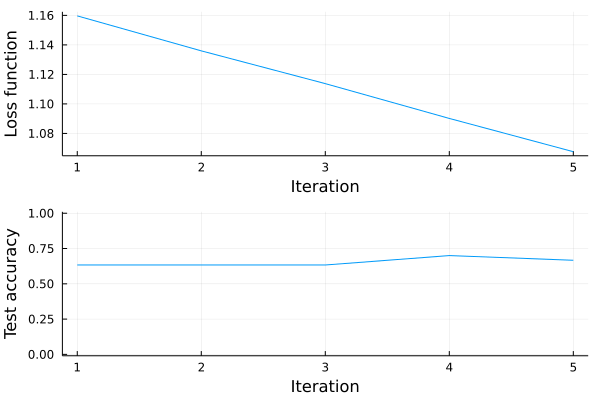

In [4]:
p1 = plot(Loss_history, xlabel="Iteration", ylabel="Loss function", label="")
p2 = plot(acc_test, xlabel="Iteration", ylabel="Test accuracy", label="", ylim=(-0.01, 1.01))
plot(p1,p2, layout = (2,1))
